In [ ]:
# user inputs for retirement portfolio simulation

print(" Retirement Portfolio Simulation Inputs")

starting_age = int(input("Enter starting age (e.g., 65):"))
ending_age = int(input("Enter ending age (e.g., 90): "))
years = ending_age - starting_age

initial_balance = float(input("Enter initial retirement balance (e.g., 500000): "))
annual_withdrawal = float(input("Enter annual withdrawal (e.g., 25000): "))
inflation_rate = float(input("Enter expected annual inflation rate (e.g., 3%, 5%)"))/100
num_simulations = int(input("Enter number of simulations (e.g., 10000):"))

In [ ]:
# Strategy Selection
strategies = {
    "Conservative" : (0.04, 0.02),
    "Balanced" : (0.06, 0.10),
    "Aggressive" : (0.08, 0.15)
}

print("\n Available strategies: ")
for i, key in enumerate(strategies):
    print(f'{i+1}. {key}')

choice = int(input("Enter the corresponding number for the strategy you want to use (1-3): "))
strategy_name = list(strategies.keys())[choice - 1]
mean_return, std_dev = strategies[strategy_name]

In [ ]:
# Running the simulation

import numpy as np

final_balances = [] # List to store final balances after each simulation
fund_lasted = 0


for i in range(num_simulations): 
    balance = initial_balance
    withdrawal = annual_withdrawal

    for year in range(years): 
        annual_return = np.random.normal(mean_return, std_dev)
        balance *= (1+ annual_return)
        balance -= withdrawal
        withdrawal *= (1 + inflation_rate)  # Withdrawal increases every year
        if balance <= 0:
            balance = 0
            break
        
    final_balances.append(balance)
    if balance > 0:
        fund_lasted += 1

In [ ]:
# Results

survival_rate = fund_lasted / num_simulations * 100
print(f"\n Strategy: {strategy_name}")
print(f" Probability of portfolio lasting until age {ending_age}: {survival_rate:.2f}%")

Probability of fund lasting until age 90:  93.56%


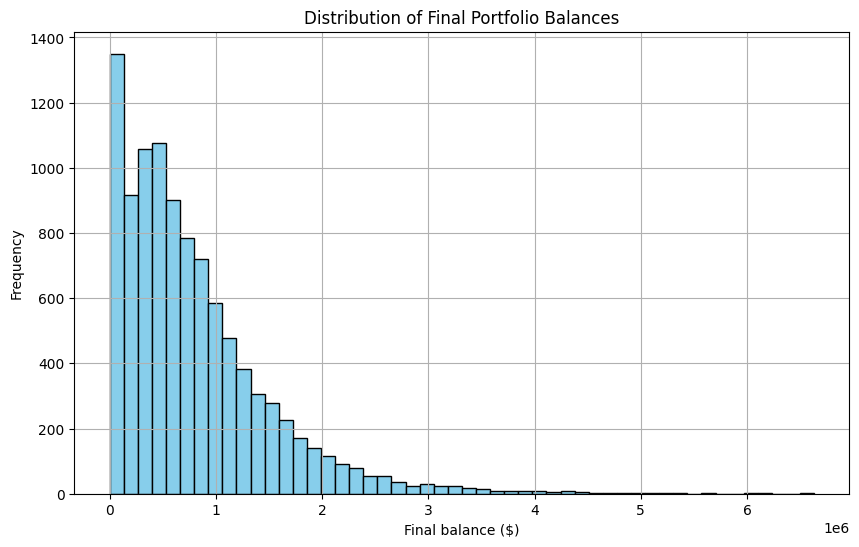

In [ ]:
# Histogram Plot

import matplotlib.pyplot as plt 

plt.figure(figsize=(10,6))
plt.hist(final_balances, bins=50, color = 'skyblue', edgecolor = 'black')
plt.title(f"Final Portfolio Balances – {strategy_name} Strategy")
plt.xlabel('Final balance ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()